***

## Pandas第二课作业

####  作业提交说明：
- 位置：作业文件统一放置于/0.Teacher/Exercise/Pandas2/下
- 文件名：请先复制该notebook文件，并重新命名为(课程名)+(您姓名的全拼)，并按要求完成后保存
- 时间：课程结束后的第二天前提交。
- 注意：请勿抄袭，移动，修改，删除其他同学和原始空白的练习文件。


## 作业
- 作业所需数据文件位于0.Teacher/data目录下
***

In [2]:
%config ZMQInteractiveShell.ast_node_interactivity="all"

In [1]:
import numpy as np
import pandas as pd 
%matplotlib inline


#### 1.读入0.Teacher/Data/下NVDA.csv中的数据


In [65]:
nvda = pd.read_csv("data/NVDA.csv",index_col="Date",parse_dates=["Date"])
nvda.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,1.750000,1.953125,1.552083,1.640625,1.523430,67867200
1999-01-25,1.770833,1.833333,1.640625,1.812500,1.683028,12762000
1999-01-26,1.833333,1.869792,1.645833,1.671875,1.552448,8580000
1999-01-27,1.677083,1.718750,1.583333,1.666667,1.547611,6109200
1999-01-28,1.666667,1.677083,1.651042,1.661458,1.542776,5688000


#### 2.请计算nvda股票Adj Close每天的log return

In [66]:
# log return就是今天的价格除以昨天的，然后取log

In [67]:
import math

def func(x):
    a = []
    for i in range(len(x)):
        if i == 0:
            a.append(None)
        else:
            a.append(math.log(x[i]/x[i-1]))
            
    return a

In [68]:
nvda["log return"] = func(nvda["Adj Close"])
nvda.head()

,Open,High,Low,Close,Adj Close,Volume,log return
Date,,,,,,,
1999-01-22,1.750000,1.953125,1.552083,1.640625,1.523430,67867200,NaN
1999-01-25,1.770833,1.833333,1.640625,1.812500,1.683028,12762000,0.099630
1999-01-26,1.833333,1.869792,1.645833,1.671875,1.552448,8580000,-0.080762
1999-01-27,1.677083,1.718750,1.583333,1.666667,1.547611,6109200,-0.003121
1999-01-28,1.666667,1.677083,1.651042,1.661458,1.542776,5688000,-0.003129


#### 3.请找出nvda股票涨幅最大的10天

In [69]:
# 涨跌幅是 今天的（收盘价 - 昨天的收盘价）/ 昨天的收盘价

def func1(x):
    a = []
    for i in range(len(x)):
        if i == 0:
            a.append(None)
        else:
            a.append((x[i] - x[i-1]) / x[i-1] )
            
    return a

In [85]:
nvda["jump"] = func1(nvda["Close"])
nvda.sort_values(by="jump",ascending=False)[:10].index

DatetimeIndex(['2000-03-07', '2003-05-09', '2001-01-03', '2016-11-11',
               '2000-03-13', '2000-12-22', '2000-12-08', '2000-04-05',
               '2003-02-14', '1999-08-19'],
              dtype='datetime64[ns]', name='Date', freq=None)

#### 4. 将这十天的股票信息都输出来

In [86]:
nvda.sort_values(by="jump",ascending=False)[:10]

,Open,High,Low,Close,Adj Close,Volume,log return,jump
Date,,,,,,,,
2000-03-07,6.250000,7.270833,5.979167,6.942708,6.446771,48805200,0.353572,0.424145
2003-05-09,6.276667,7.176667,6.100000,7.123333,6.614493,230771400,0.285656,0.330635
2001-01-03,4.833333,6.572917,4.708333,6.520833,6.055031,22759200,0.267650,0.306889
2016-11-11,79.510002,88.769997,78.500000,87.970001,87.635475,54335100,0.260876,0.298067
2000-03-13,8.916667,12.500000,8.833333,12.437500,11.549053,60379200,0.234938,0.264831
2000-12-22,5.020833,6.375000,5.020833,5.843750,5.426314,23727000,0.229402,0.257848
2000-12-08,7.447917,8.333333,6.752600,8.291667,7.699371,21334800,0.205709,0.228395
2000-04-05,6.312500,8.125000,5.989583,7.640625,7.094833,15990000,0.200898,0.222500
2003-02-14,3.740000,4.016667,3.650000,4.013333,3.726649,88721100,0.198735,0.219858


#### 5把英伟达每个月最后一天的股价记录下来，做成一张新的月线图，然后把Adj Close画成一张图

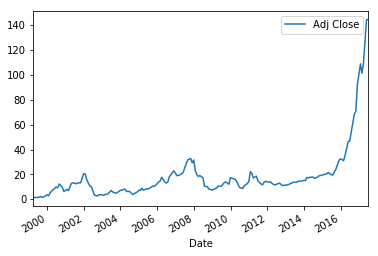

In [23]:
nvda.loc[nvda.index.is_month_end,["Adj Close"]].plot()

#### 6.使用concat方法把英伟达的Adj Close与其他三只股票拼接在一起

In [91]:
goog = pd.read_csv("data/GOOG.csv",index_col="Date",parse_dates=["Date"])

aapl = pd.read_csv("data/AAPL.csv",index_col="Date",parse_dates=["Date"])

msft = pd.read_csv("data/MSFT.csv",index_col="Date",parse_dates=["Date"])

In [99]:
Adj_Close = pd.concat([nvda["Adj Close"].rename("NVDA"),goog["Adj Close"].rename("GOOG"),\
           aapl["Adj Close"].rename("AAPL"),msft["Adj Close"].rename("MSFT")],sort=False,axis=1)

In [100]:
Adj_Close.head()

,NVDA,GOOG,AAPL,MSFT
Date,,,,
1980-12-12,NaN,NaN,0.423252,NaN
1980-12-15,NaN,NaN,0.401170,NaN
1980-12-16,NaN,NaN,0.371726,NaN
1980-12-17,NaN,NaN,0.380927,NaN
1980-12-18,NaN,NaN,0.391969,NaN


#### 7.从Google有数据的那一天起开始画出四只股票的Adj Close折线图


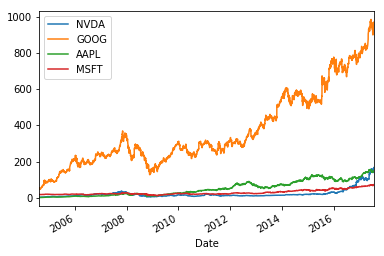

In [104]:
Adj_Close[Adj_Close["GOOG"].notnull()].plot()